<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/distributionChecker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install pandas scipy matplotlib openpyxl


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22756.
  res = hypotest_fun_out(*samples, **kwds)


Column A:
  Shapiro-Wilk test p-value: 0.0000 - Not normally distributed
  Skewness: 2.5097 - Positively skewed
---------------------------------


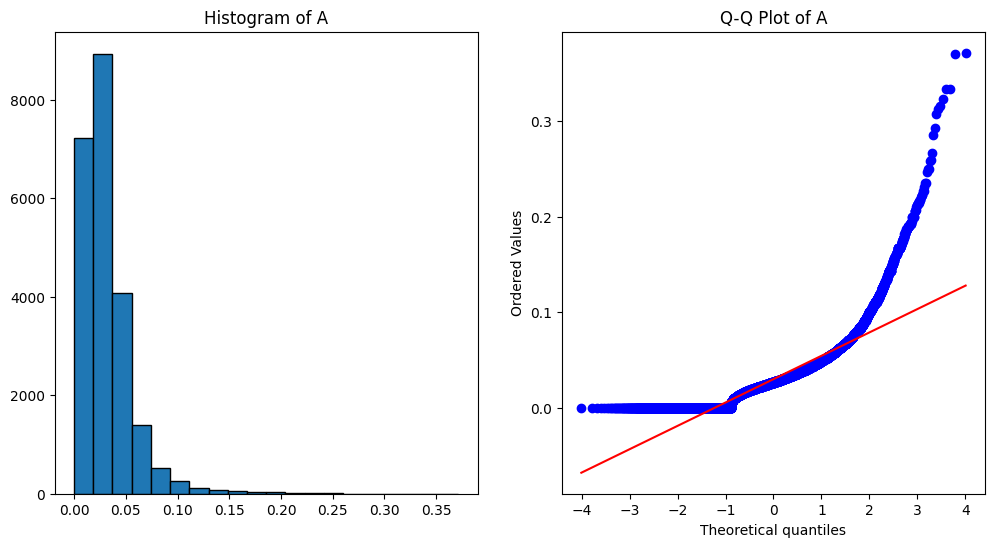

Column B:
  Shapiro-Wilk test p-value: 0.0000 - Not normally distributed
  Skewness: 1.9987 - Positively skewed
---------------------------------


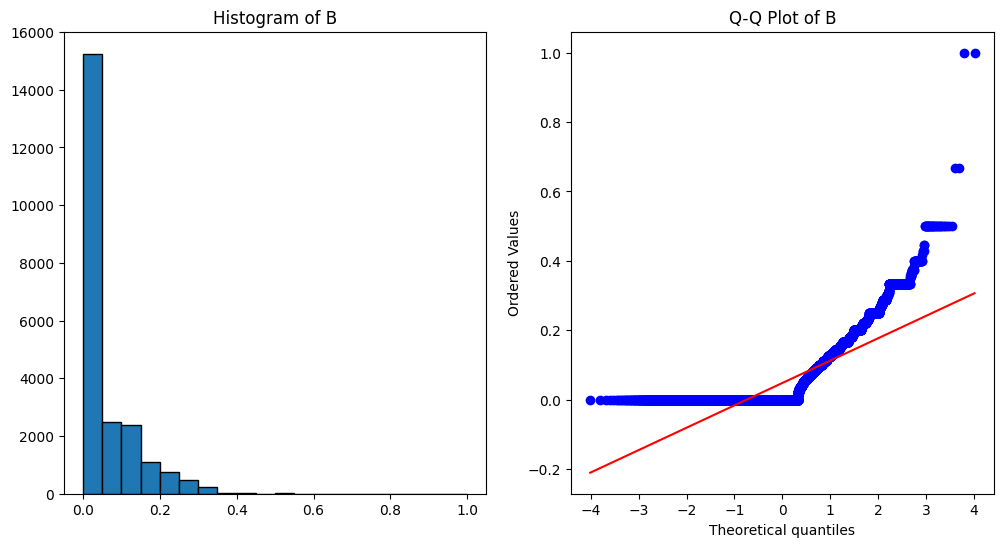

Column C:
  Shapiro-Wilk test p-value: nan - Not normally distributed
  Skewness: 5.3343 - Positively skewed
---------------------------------


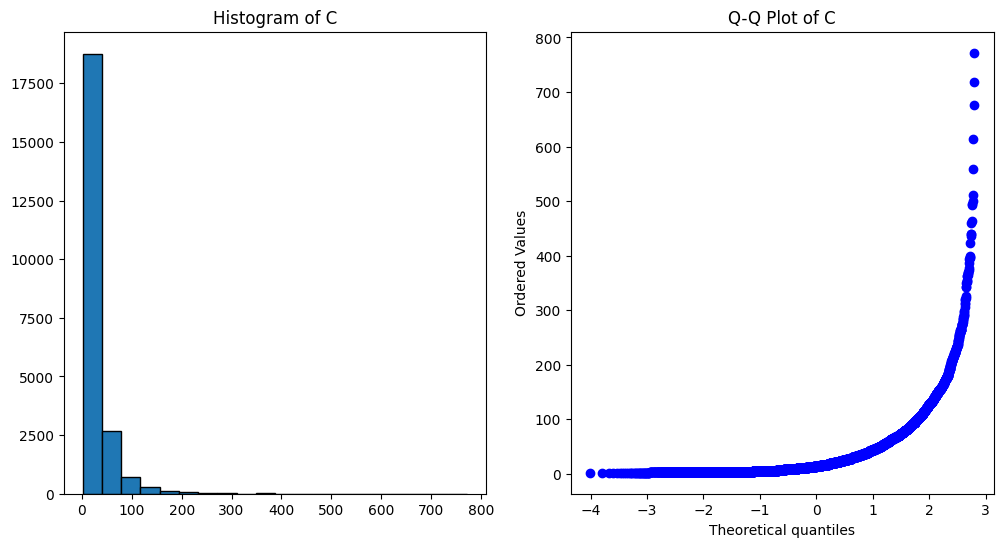

Column D:
  Shapiro-Wilk test p-value: 0.0000 - Not normally distributed
  Skewness: 1.6851 - Positively skewed
---------------------------------


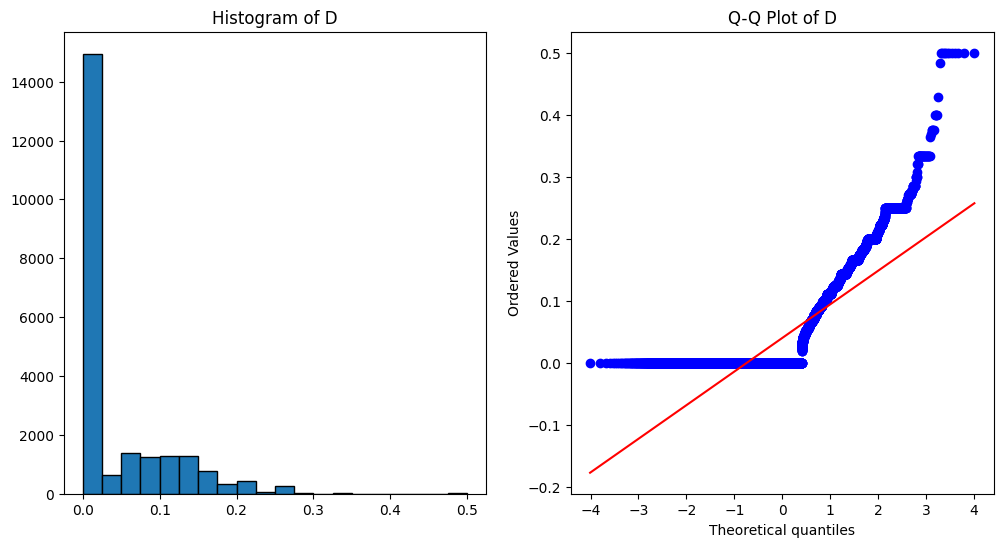

Column E:
  Shapiro-Wilk test p-value: 0.0000 - Not normally distributed
  Skewness: -1.1330 - Negatively skewed
---------------------------------


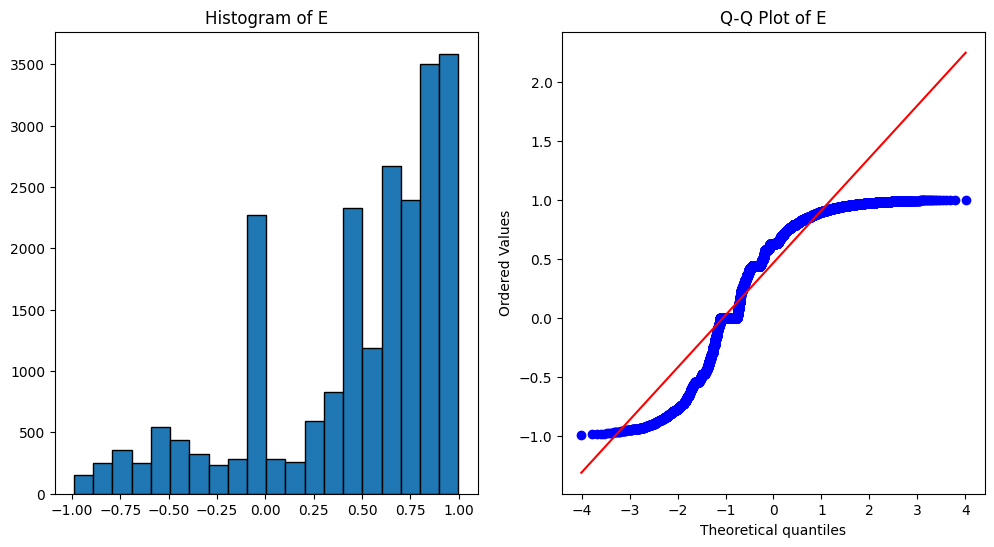

Column F:
  Shapiro-Wilk test p-value: 0.0000 - Not normally distributed
  Skewness: -0.2497 - Negatively skewed
---------------------------------


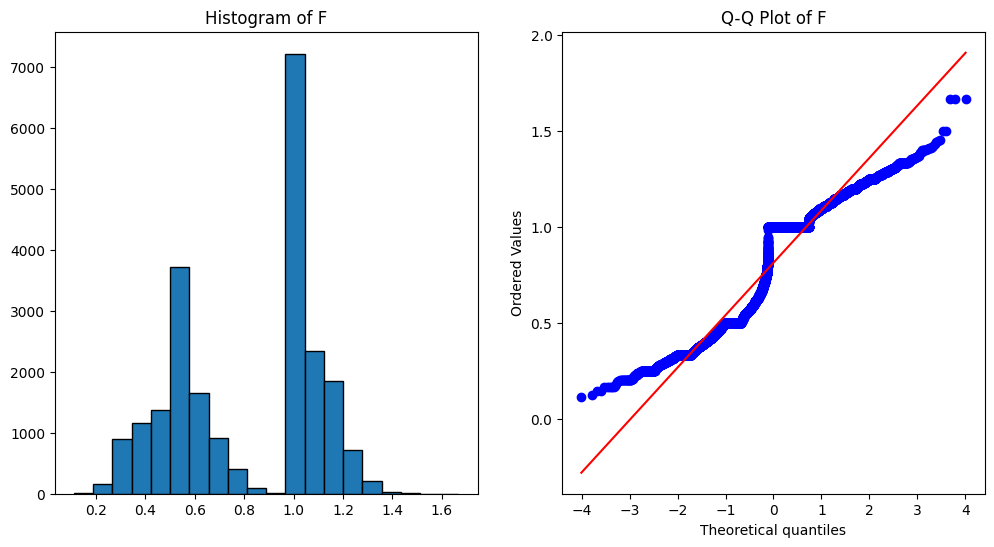

Column G:
  Shapiro-Wilk test p-value: 0.0000 - Not normally distributed
  Skewness: 5.6363 - Positively skewed
---------------------------------


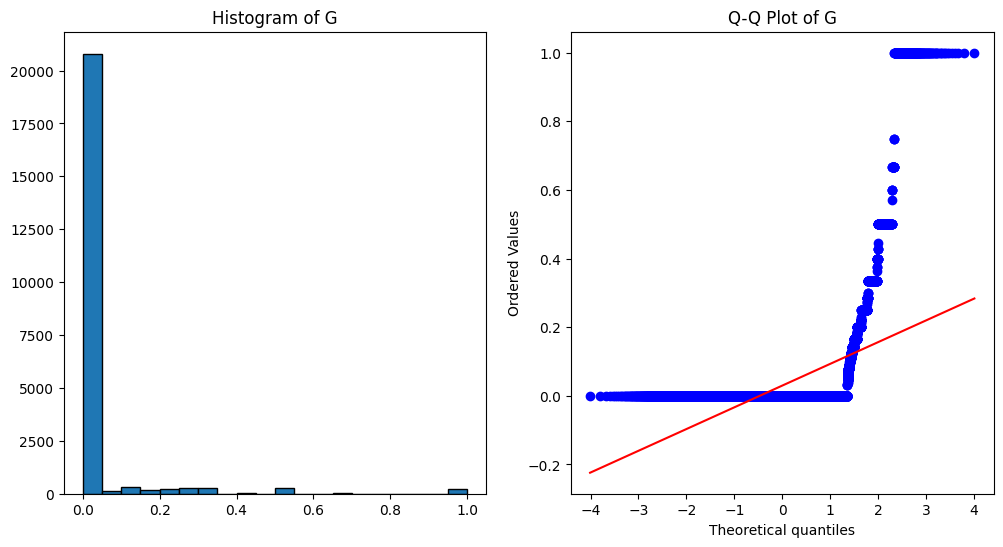

Column H:
  Shapiro-Wilk test p-value: nan - Not normally distributed
  Skewness: 52.2825 - Positively skewed
---------------------------------


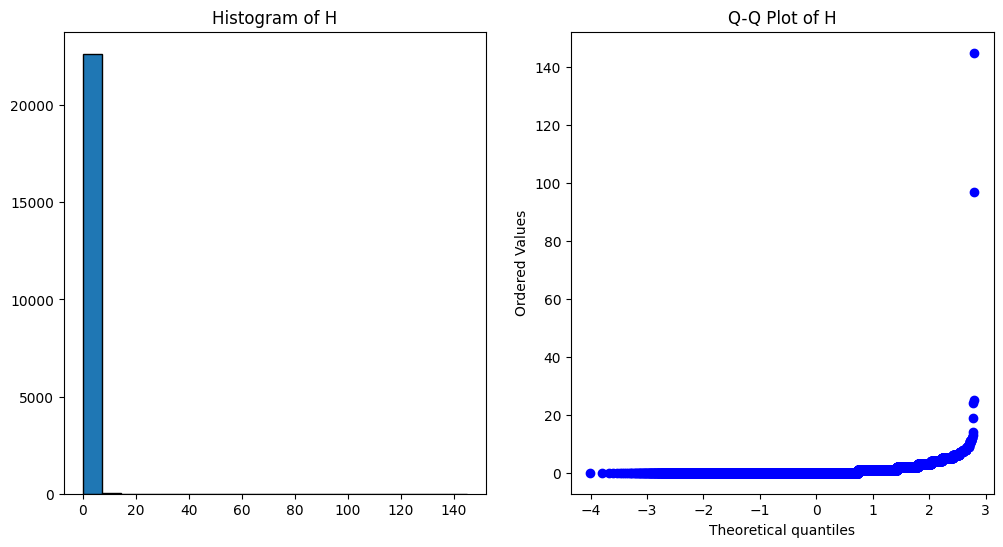

Column I:
  Shapiro-Wilk test p-value: nan - Not normally distributed
  Skewness: 5.0931 - Positively skewed
---------------------------------


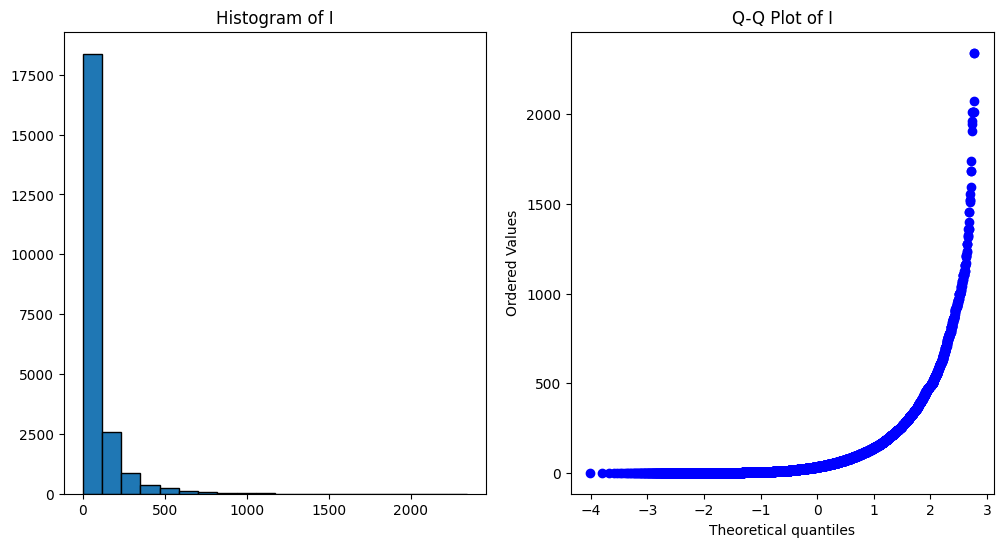

Column J:
  Shapiro-Wilk test p-value: nan - Not normally distributed
  Skewness: 0.2824 - Positively skewed
---------------------------------


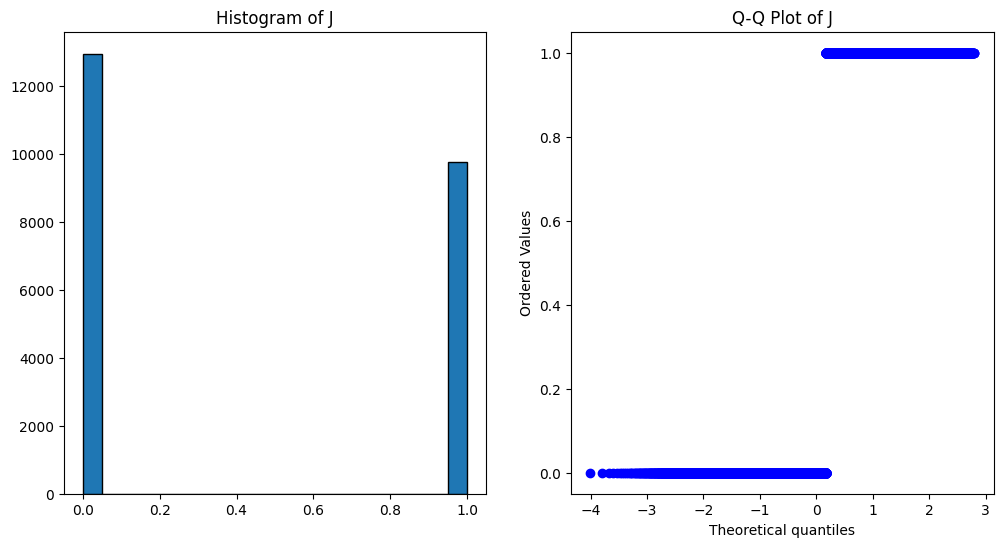

Column K:
  Shapiro-Wilk test p-value: nan - Not normally distributed
  Skewness: 5.1489 - Positively skewed
---------------------------------


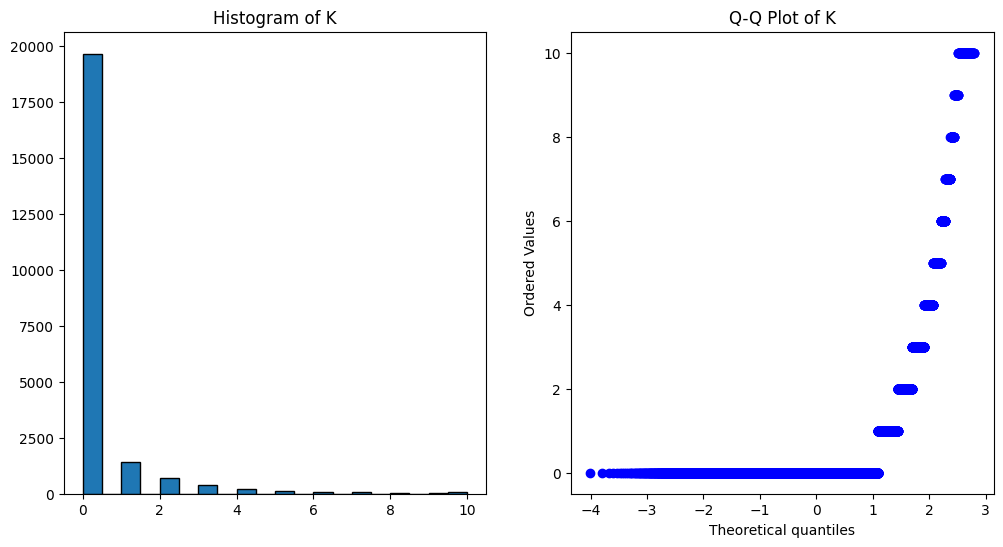

In [18]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('distributionCalculation.xlsx')

# Function to check normality and skewness
def check_distribution(data):
    results = {}
    for column in data.columns:
        # Perform Shapiro-Wilk test
        stat, p_value = stats.shapiro(data[column])
        if p_value > 0.05:
            normality = 'Normally distributed'
        else:
            normality = 'Not normally distributed'

        # Determine skewness
        skewness = data[column].skew()
        if skewness > 0:
            skewness_type = 'Positively skewed'
        elif skewness < 0:
            skewness_type = 'Negatively skewed'
        else:
            skewness_type = 'Symmetrical'

        results[column] = {'Normality': normality, 'Skewness': skewness_type}

        # Print results
        print(f'Column {column}:')
        print(f'  Shapiro-Wilk test p-value: {p_value:.4f} - {normality}')
        print(f'  Skewness: {skewness:.4f} - {skewness_type}')
        print('---------------------------------')

        # Plot histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.hist(data[column], bins=20, edgecolor='black')
        plt.title(f'Histogram of {column}')

        # Plot Q-Q plot
        plt.subplot(1, 2, 2)
        stats.probplot(data[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {column}')
        plt.show()

    return results

# Check the distribution of columns A to K columns (indecators)
distribution_results = check_distribution(df[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K']])
